In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
df = pd.read_csv("regLin.csv",header=0)
df.describe()

,X,y
count,1029.000000,1029.000000
mean,50.008111,32.893917
std,29.055066,18.083566
min,0.030369,-4.586608
25%,25.201087,17.583093
50%,50.884987,33.564129
75%,75.636823,48.339811
max,99.959580,71.762748


In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(df[df.columns[0:-1]],df[df.columns[-1]], train_size=0.75)

/Users/danielespinosa/gitsome/claseMachineLearning/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Conviene tratar todo en términos de matrices ya que en este trabajo no estaré utilizando las funciones de las DF de pandas

In [5]:
X_trainM = X_train.as_matrix()
Y_trainM = Y_train.as_matrix()

X_testM = X_test.as_matrix()
Y_testM = Y_test.as_matrix()

In [6]:
regressor = LinearRegression(copy_X = True, fit_intercept = True, n_jobs=1, normalize= False)

In [7]:
regressor.fit(X_trainM, Y_trainM)

/Users/danielespinosa/gitsome/claseMachineLearning/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
y = regressor.predict(X_testM)

#### Esta gráfica es un scatter de los puntos que predice el modelo contra los puntos reales (contra los que no entrenó)

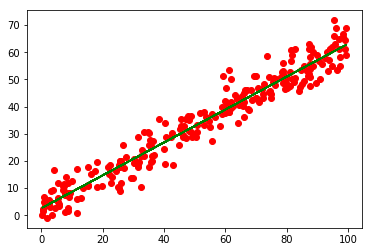

In [9]:
#plot del test contra la regresion que se predijo de train
plt.plot(X_test, Y_test, 'ro')
#plt.axis([0, 6, 0, 20])
plt.plot(X_test, y, 'g-')
plt.show()

Plottear la curva de error

In [10]:
#y

In [11]:
#Este es el coeficiente que minimiza la funcion de error cuadrado medio
regressor.coef_[0]

0.60608617222088335

In [12]:
#Fijamos el intercept a w0, este no lo variaremos por ahora.
w0 = regressor.intercept_
w0

2.562842534084794

Hacemos un sweep cambiando el coeficiente

In [13]:
w1arr = np.linspace(0,4,len(Y_trainM))
len(X_trainM)

771

In [14]:
#Funcion para calcular el MSE dependiendo de los parametros w0 y w1
def calculateError(X,Y,w0,w1):
    error = 0
    for i in range(0,len(Y)):
        yEst = w0 + (w1*X[i])
        error += ((yEst-Y[i])**2)

    error = error/len(Y)
    
    return error[0]

In [15]:
w1Error = []

for i in range(0,len(w1arr)):
    w1Error.append((calculateError(X_trainM,Y_trainM,w0,w1arr[i])))


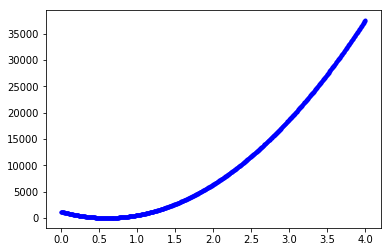

In [18]:
plt.plot(w1arr, w1Error, 'b.')
plt.show()

Podemos también calcular el error para el *intercept*. En este caso, fijemos w1 con el óptimo que la regresión de sklearn había calculado y cambiemos w0.

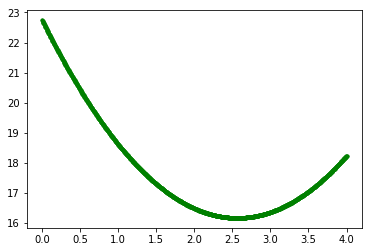

In [20]:
w1 = regressor.coef_[0]
w0arr = np.linspace(0,4,len(Y_trainM))

w0Error = []

for i in range(0,len(w0arr)):
    w0Error.append((calculateError(X_trainM,Y_trainM,w0arr[i],w1)))

    
plt.plot(w0arr, w0Error, 'g.')
plt.show()

Por supuesto que se puede hacer las dos optimizaciones al mismo tiempo (y esto es realmente lo que hace la biblioteca de sklearn o cualquier regresión lineal).

In [41]:
#Use less points so this doesn't take ages...

w0arr = np.linspace(0,4,30)
w1arr = np.linspace(0,4,30)

bothError = []
for i in range(0,len(w0arr)):
    bothError.append([])
    for j in range(0,len(w1arr)):
        bothError[i].append((calculateError(X_trainM,Y_trainM,w0arr[i],w1arr[j])))

In [39]:
bothError

[[1373.8849608101718,
  633.01254757898516,
  181.18757912990327,
  18.410055462927755,
  144.67997657805785,
  559.997342475295,
  1264.362153154636,
  2257.774408616086,
  3540.2341088596368,
  5111.7412538852959,
  6972.2958436930712,
  9121.8978782829327,
  11560.547357654912,
  14288.244281808998,
  17304.988650745188,
  20610.780464463478,
  24205.619722963864,
  28089.506426246371,
  32262.440574310996,
  36724.422167157732],
 [1360.2559834267131,
  623.75821549638329,
  176.3078923481599,
  17.905013982042611,
  148.54958039803117,
  568.24159159612611,
  1276.9810475763254,
  2274.7679483386351,
  3561.6022938830429,
  5137.4840842095637,
  7002.413319318186,
  9156.3899992089173,
  11599.414123881754,
  14331.485693336697,
  17352.604707573752,
  20662.771166592855,
  24261.985070394127,
  28150.246418977513,
  32327.555212342962,
  36793.911450490552],
 [1346.7156487025309,
  614.59252607306087,
  171.51684822569644,
  17.488615160437245,
  152.50782687728403,
  576.57448337

Hacemos el plot.

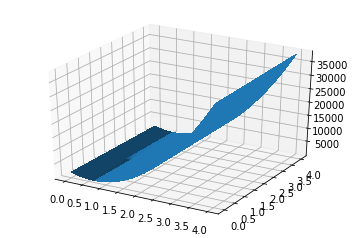

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(w0arr, w1arr)

ax.plot_surface(X, Y,bothError,rstride=1, cstride=1,linewidth=0, antialiased=False)
plt.show()